Author: 
Adegbenro Michael Olusola:

Note:
From the machine learning point of view, raw text is useless. Only if we manage to transform it into meaningful numbers, can we feed it into our machine-learning algorithms such as clustering. The same is true for more mundane operations on text,
such as similarity measurement

This project can pull data from Tweeter but to do that you need to request for your own API keys specified below (I removed mine):
- my_api_key = "xxxxxxxxx"
- my_api_secret = "yyyyyyy"

If you don't have API keys already, you may use "Raw Data" which i pulled from tweeter using:
- search_query = "#Buhari -filter:retweet" 
    - (Buahri is the perseident of Nigeria from 2015 to 2023)

You can specifiy amount of tweets you want to pull. Here I pulled 100 

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from nltk.stem import WordNetLemmatizer
import seaborn as sns
sns.set(style="white",color_codes=True)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
sns.set(font_scale=1.5)
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tweepy as tw
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### No need to run this cell if you don't have API keys, move to next cell to upload "Raw Data" in this project. You may remove this cell or change it to "Markdown"

In [2]:
# No need to run this cell if you don't have API keys, move to next cell to upload "Raw Data" in this project. Ypu may remove
# or change it to "Markdown"

# your Twitter API key and API secret
my_api_key = "xxxxxxxxxxxx"
my_api_secret = "xxxxxxxxxxxxxxxxxxx"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

search_query = "#Buhari -filter:retweet"


# get tweets from the API
#tweets = tw.Cursor(api.search_tweets,q=search_query,lang="en",since="2015-09-16").items(100)

tweets = tw.Cursor(api.search_tweets,q=search_query,lang="en").items(100)
# store the API responses in a list

tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))


# intialize the dataframe
data= pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    data = data.append(pd.DataFrame({'user_name': tweet.user.name, 
                                    'ID': tweet.id_str, 
                                    'user_location': tweet.user.location,\
                                    'user_description': tweet.user.description,
                                    'user_verified': tweet.user.verified,
                                    'date': tweet.created_at,
                                    'text': text, 
                                    'language': tweet.lang,
                                    'favourites-count': tweet.favorite_count,
                                    'author': tweet.user.screen_name,
                                    'retweet-count': tweet.retweet_count,
                                    'hashtags': [hashtags if hashtags else None],
                                    'source': tweet.source}))
    data = data.reset_index(drop=True)

### Run this cell after running libraries cell above if you don't have API key. 
#### you may request for a key from here: https://developer.twitter.com/en/portal/dashboard
##### you need a twitter account to request API key

In [2]:
data = pd.read_csv('Raw Data.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,favourites-count,author,retweet-count,hashtags,source
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT @ayemojubar: #Buhari: Musa saw it coming. 😭...,en,0,okekeikedichuk1,193,['Buhari'],Twitter for iPhone
1,1,1,Still Rich,1485376501885423616,NaN,Still rich as fxck,False,2022-01-23 22:18:49+00:00,"You all are saying trash, okoye gave his best....",en,0,StillRich_asf,0,NaN,Twitter for Android
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka after the match knowing Nigerians will ...,en,0,Adetywoo,0,"['sadiq', 'Buhari']",Twitter for Android
3,3,3,iam._lolu,1485376482419560448,Nigeria,🎶 🎶 music..,False,2022-01-23 22:18:45+00:00,Nigeria suppose get YouTube channel😂😂 which ki...,en,0,iam_Loluu,0,NaN,Twitter for iPhone
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I just regret watching this match. This countr...,en,0,ikirikococsy,0,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android


In [4]:
#save raw data extrated in local drive

data.to_csv("Raw Data.csv")

In [5]:
pd.DataFrame(data.text).head()

,text
0,RT @ayemojubar: #Buhari: Musa saw it coming. 😭...
1,"You all are saying trash, okoye gave his best...."
2,Maduka after the match knowing Nigerians will ...
3,Nigeria suppose get YouTube channel😂😂 which ki...
4,I just regret watching this match. This countr...


## Clean text

### my analysis is based on tweet "text" only. That is why i cleaned "text" only. You may clean other features if you want. 

In [6]:
#Remove twitter handlers
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

pd.DataFrame(data.text).head()

,text
0,RT Musa saw it comingblame Desmond Elliot for ...
1,You all are saying trash okoye gave his best I...
2,Maduka after the match knowing Nigerians will ...
3,Nigeria suppose get YouTube channel which kind...
4,I just regret watching this match This country...


In [7]:
# Dataframe now stored in local drive as Project.csv 
data.text.to_csv("Clean text.csv")

We have to notify the vectorizer about the full dataset so that it knows upfront what
words are to be expected, as shown in the following code:

## Lemmatization and Steaaming

Lemmatization is a better way to obtain the original form of any given text rather than stemming because lemmatization returns the actual word that has some meaning in the dictionary

- Stemming is used to remove any kind of suffix from the word and return the word in its original form that is the root word but sometimes the root word that is generated is a non-meaningful word or it does not belong to the English dictionary
     - Original words- ['playing', 'playful', 'played']
     - After stemming - ['play', 'play', 'play']
     
     

- Lemmatization is similar to stemming but it works with much better efficiency. In lemmatization, the word that is generated after chopping off the suffix is always meaningful and belongs to the dictionary that means it does not produce any incorrect word
    - Original words- ['cries', 'crys', 'cried']
    - After lemmatization ['cry', 'cry', 'cried']

In [8]:
ps = PorterStemmer()
words= data.text
stem_words=[]
for word in words:
    root_word= ps.stem(word)
    stem_words.append(root_word)

In [9]:
stem_words

['rt musa saw it comingblame desmond elliot for all thi',
 'you all are saying trash okoye gave his best is itcrime to befine boy tomorrow your girl will be on his dm ya better think right',
 'maduka after the match knowing nigerians will drag him',
 'nigeria suppose get youtube channel which kind netflix season film be this trailer bam bam movie just whack on top one call this 2022 may buhari not call youat the peak of your success may buhari not dial your numb',
 'i just regret watching this match this country na pure cruise swear',
 'be likem only one call away comrade whi',
 'i stand by you you need to improve na the zoom call cause am not y',
 'rt pray against any form of buhari call in your life amen',
 'soon you hearhad buhari today it didngo wel',
 'pray against any form of buhari call in your life amen',
 'small talk loud and we will colonize you if not for call we wonbe in this situ',
 'rt we donhave light our keeper issuper model we are out of afcon is our president ghana wh

In [10]:
wml = WordNetLemmatizer()
lemma_words=[]
for word in data.text:
    tokens = wml.lemmatize(word)
    lemma_words.append(tokens)

In [11]:
lemma_words = pd.DataFrame(lemma_words)

In [12]:
# Dataframe now stored in local drive as Project.csv 
lemma_words.to_csv("Lemmatized text.csv")

## Removing Stop-words

Stop words are those words in any language that helps to combine the sentence and make it meaningful. for eg. In the English language various words like “I, am, are, is to, etc. are all known as stop-wards. But these stop-words are not that much useful for our model so there is a need to remove these stop-words from our dataset so that we can focus on only important words rather than these supporting words.

In [13]:
stop_words = stopwords.words('english')
data.text = data.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [14]:
data.text

0                RT Musa saw comingblame Desmond Elliot
1     You saying trash okoye gave best Is itcrime be...
2                   Maduka match knowing Nigerians drag
3     Nigeria suppose get YouTube channel kind Netfl...
4     I regret watching match This country na pure c...
                            ...                        
95        May receive call Buhari week ifrefuse retweet
96               RT Musa saw comingblame Desmond Elliot
97               RT Musa saw comingblame Desmond Elliot
98                            RT Iyalaya anybody beaten
99    Forget First coach leave awoniyi whole first h...
Name: text, Length: 100, dtype: object

In [15]:
# Dataframe now stored in local drive as Project.csv 
data.text.to_csv("Without Stopword.csv")

# Vader Sentiment Analysis

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up each word's intensity in the text.

For example,- Words like 'love,' 'enjoy,' 'happy,' 'like' all convey a positive sentiment. Also, VADER is intelligent enough to understand these words' basic context, such as "did not love" as a negative statement. It also understands the emphasis of capitalization and punctuation, such as "ENJOY."

In [16]:
## Added "Sentiment" column and categorized in positive, negative and neutral

In [17]:
sid = SIA()
data['Sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['Sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['Sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['Sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,favourites-count,author,retweet-count,hashtags,source,Sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT Musa saw comingblame Desmond Elliot,en,0,okekeikedichuk1,193,['Buhari'],Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001
1,1,1,Still Rich,1485376501885423616,NaN,Still rich as fxck,False,2022-01-23 22:18:49+00:00,You saying trash okoye gave best Is itcrime be...,en,0,StillRich_asf,0,NaN,Twitter for Android,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.321001,0.679001,0.000001
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka match knowing Nigerians drag,en,0,Adetywoo,0,"['sadiq', 'Buhari']",Twitter for Android,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",0.000001,0.678001,0.322001
3,3,3,iam._lolu,1485376482419560448,Nigeria,🎶 🎶 music..,False,2022-01-23 22:18:45+00:00,Nigeria suppose get YouTube channel kind Netfl...,en,0,iam_Loluu,0,NaN,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",0.298001,0.702001,0.000001
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I regret watching match This country na pure c...,en,0,ikirikococsy,0,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android,"{'neg': 0.255, 'neu': 0.636, 'pos': 0.109, 'co...",0.109001,0.636001,0.255001


In [18]:
# drop sentiments column... not needed
data.drop(columns=['Sentiments'],inplace=True)
data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,favourites-count,author,retweet-count,hashtags,source,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT Musa saw comingblame Desmond Elliot,en,0,okekeikedichuk1,193,['Buhari'],Twitter for iPhone,0.000001,1.000001,0.000001
1,1,1,Still Rich,1485376501885423616,NaN,Still rich as fxck,False,2022-01-23 22:18:49+00:00,You saying trash okoye gave best Is itcrime be...,en,0,StillRich_asf,0,NaN,Twitter for Android,0.321001,0.679001,0.000001
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka match knowing Nigerians drag,en,0,Adetywoo,0,"['sadiq', 'Buhari']",Twitter for Android,0.000001,0.678001,0.322001
3,3,3,iam._lolu,1485376482419560448,Nigeria,🎶 🎶 music..,False,2022-01-23 22:18:45+00:00,Nigeria suppose get YouTube channel kind Netfl...,en,0,iam_Loluu,0,NaN,Twitter for iPhone,0.298001,0.702001,0.000001
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I regret watching match This country na pure c...,en,0,ikirikococsy,0,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android,0.109001,0.636001,0.255001


In [19]:
#Number of Words
data['Number of Words'] =data.text.apply(lambda x:len(x.split(' ')))
#Average Word Length
data['Mean Word Length'] = data.text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,favourites-count,author,retweet-count,hashtags,source,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number of Words,Mean Word Length
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT Musa saw comingblame Desmond Elliot,en,0,okekeikedichuk1,193,['Buhari'],Twitter for iPhone,0.000001,1.000001,0.000001,6,5.50
1,1,1,Still Rich,1485376501885423616,NaN,Still rich as fxck,False,2022-01-23 22:18:49+00:00,You saying trash okoye gave best Is itcrime be...,en,0,StillRich_asf,0,NaN,Twitter for Android,0.321001,0.679001,0.000001,17,4.53
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka match knowing Nigerians drag,en,0,Adetywoo,0,"['sadiq', 'Buhari']",Twitter for Android,0.000001,0.678001,0.322001,5,6.20
3,3,3,iam._lolu,1485376482419560448,Nigeria,🎶 🎶 music..,False,2022-01-23 22:18:45+00:00,Nigeria suppose get YouTube channel kind Netfl...,en,0,iam_Loluu,0,NaN,Twitter for iPhone,0.298001,0.702001,0.000001,28,4.89
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I regret watching match This country na pure c...,en,0,ikirikococsy,0,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android,0.109001,0.636001,0.255001,10,4.90


<function matplotlib.pyplot.show(close=None, block=None)>

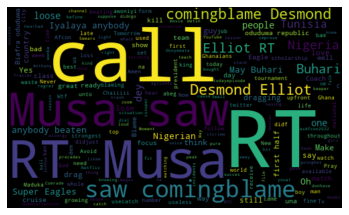

In [20]:
# WordCloud using atual clean data
allWords = ' '.join( [cmts for cmts in data.text])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

Sentimental Analysis

Polarity and Subjectivity

In starting with the analysis we will create the new columns namely Polarity and Subjectivity and acquire the very values of each comment. Polarity ranges from -1 to 1 and measures how positive or negative a comment is. It simply means emotions expressed in a sentence. Subjectivity expresses some personal feelings, views, or beliefs. A subjective sentence may not express any sentiment.

In [21]:
# get subjectivity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# get polarity
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

#Columns
data['Subjectivity'] = data['text'].apply(getSubjectivity)
data['Polarity'] = data['text'].apply(getPolarity)

data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,...,retweet-count,hashtags,source,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number of Words,Mean Word Length,Subjectivity,Polarity
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT Musa saw comingblame Desmond Elliot,en,...,193,['Buhari'],Twitter for iPhone,0.000001,1.000001,0.000001,6,5.50,0.000000,0.000000
1,1,1,Still Rich,1485376501885423616,NaN,Still rich as fxck,False,2022-01-23 22:18:49+00:00,You saying trash okoye gave best Is itcrime be...,en,...,0,NaN,Twitter for Android,0.321001,0.679001,0.000001,17,4.53,0.445238,0.595238
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka match knowing Nigerians drag,en,...,0,"['sadiq', 'Buhari']",Twitter for Android,0.000001,0.678001,0.322001,5,6.20,0.070833,-0.100000
3,3,3,iam._lolu,1485376482419560448,Nigeria,🎶 🎶 music..,False,2022-01-23 22:18:45+00:00,Nigeria suppose get YouTube channel kind Netfl...,en,...,0,NaN,Twitter for iPhone,0.298001,0.702001,0.000001,28,4.89,0.466667,0.466667
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I regret watching match This country na pure c...,en,...,0,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android,0.109001,0.636001,0.255001,10,4.90,0.500000,0.214286


In [22]:
# function to compute analysis
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [23]:
# % Percentages:
pcomments = data[data.Analysis == 'Positive']
pcomments = pcomments['text']

print('Positive: ' +str(round((pcomments.shape[0]/data.shape[0])*100, 1))+ '%')

ncomments = data[data.Analysis == 'Negative']
ncomments = ncomments['text']

print('Negative: ' +str(round((ncomments.shape[0]/data.shape[0])*100, 1))+ '%')

nucomments = data[data.Analysis == 'Neutral']
nucomments = nucomments['text']

print('Nuetral: ' +str(round((nucomments.shape[0]/data.shape[0])*100, 1))+ '%')

Positive: 28.0%
Negative: 17.0%
Nuetral: 55.0%


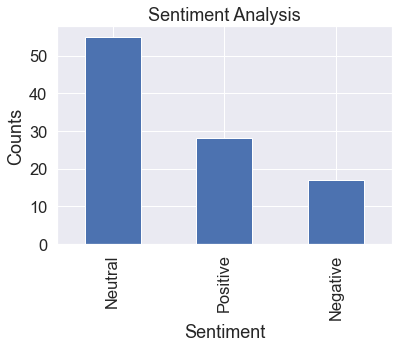

In [24]:
# Value Count
data['Analysis'].value_counts

# Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind= 'bar')
plt.show()

More on sentiment analysis: https://www.projectpro.io/article/sentiment-analysis-project-ideas-with-source-code/518

.

## Check Analysis Accuracy

In [25]:
# check the data columns
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user_name', 'ID', 'user_location',
       'user_description', 'user_verified', 'date', 'text', 'language',
       'favourites-count', 'author', 'retweet-count', 'hashtags', 'source',
       'Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment',
       'Number of Words', 'Mean Word Length', 'Subjectivity', 'Polarity',
       'Analysis'],
      dtype='object')

In [26]:
data.dtypes

Unnamed: 0              int64
Unnamed: 0.1            int64
user_name              object
ID                      int64
user_location          object
user_description       object
user_verified            bool
date                   object
text                   object
language               object
favourites-count        int64
author                 object
retweet-count           int64
hashtags               object
source                 object
Positive Sentiment    float64
Neutral Sentiment     float64
Negative Sentiment    float64
Number of Words         int64
Mean Word Length      float64
Subjectivity          float64
Polarity              float64
Analysis               object
dtype: object

In [27]:
data.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1           0
user_name              0
ID                     0
user_location         37
user_description      18
user_verified          0
date                   0
text                   0
language               0
favourites-count       0
author                 0
retweet-count          0
hashtags              12
source                 0
Positive Sentiment     0
Neutral Sentiment      0
Negative Sentiment     0
Number of Words        0
Mean Word Length       0
Subjectivity           0
Polarity               0
Analysis               0
dtype: int64

In [28]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
user_name             0
ID                    0
user_location         0
user_description      0
user_verified         0
date                  0
text                  0
language              0
favourites-count      0
author                0
retweet-count         0
hashtags              0
source                0
Positive Sentiment    0
Neutral Sentiment     0
Negative Sentiment    0
Number of Words       0
Mean Word Length      0
Subjectivity          0
Polarity              0
Analysis              0
dtype: int64

In [29]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,ID,user_location,user_description,user_verified,date,text,language,...,hashtags,source,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number of Words,Mean Word Length,Subjectivity,Polarity,Analysis
0,0,0,science_kingong_ii,1485376509959360517,"Warri, Nigeria","Manchester United Fc,Wizkid fc. Book addict 📚,...",False,2022-01-23 22:18:51+00:00,RT Musa saw comingblame Desmond Elliot,en,...,['Buhari'],Twitter for iPhone,0.000001,1.000001,0.000001,6,5.5,0.000000,0.000000,Neutral
2,2,2,Adegbola Taiwo🇳🇬,1485376486043533326,"Ibadan, Nigeria",Abeg app: @Adetywo,False,2022-01-23 22:18:45+00:00,Maduka match knowing Nigerians drag,en,...,"['sadiq', 'Buhari']",Twitter for Android,0.000001,0.678001,0.322001,5,6.2,0.070833,-0.100000,Negative
4,4,4,Ikiriko_emma,1485376478003007489,"Lagos, Nigeria",Stop dying to live the life that I'm dying to ...,False,2022-01-23 22:18:43+00:00,I regret watching match This country na pure c...,en,...,"['AFCON2021', 'SuperEagles', 'buhari']",Twitter for Android,0.109001,0.636001,0.255001,10,4.9,0.500000,0.214286,Positive
5,5,5,Jubril Olalekan,1485376477138980870,Lagos,"A student of philosophy, UI. A singer 🎶 , a pr...",False,2022-01-23 22:18:43+00:00,likem one call away Comrade,en,...,['Buhari'],Twitter Web App,0.000001,1.000001,0.000001,5,4.6,0.000000,0.000000,Neutral
7,7,7,Thefreedog🐼🦖,1485376459648688129,"Los Angeles, CA",BEAUTY and IMAGINATIONS that INSPIRE✨🤞🏿,False,2022-01-23 22:18:39+00:00,RT Pray form Buhari call life Amen,en,...,"['SoarSuperEagles', 'Buhari', 'okoye', 'Nigeri...",Twitter for Android,0.277001,0.723001,0.000001,7,4.0,0.000000,0.000000,Neutral


In [30]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user_name', 'ID', 'user_location',
       'user_description', 'user_verified', 'date', 'text', 'language',
       'favourites-count', 'author', 'retweet-count', 'hashtags', 'source',
       'Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment',
       'Number of Words', 'Mean Word Length', 'Subjectivity', 'Polarity',
       'Analysis'],
      dtype='object')

In [31]:
# drop irrelevant data 
data = data.drop(['user_name', 'ID','language', 'author','Positive Sentiment',
       'Neutral Sentiment', 'Negative Sentiment', 'Number of Words',
       'Mean Word Length','hashtags'], axis=1)

In [32]:
data.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
user_location        object
user_description     object
user_verified          bool
date                 object
text                 object
favourites-count      int64
retweet-count         int64
source               object
Subjectivity        float64
Polarity            float64
Analysis             object
dtype: object

In [33]:
enco = LabelEncoder()
data['user_location'] = enco.fit_transform(data['user_location'])
data['user_description'] = enco.fit_transform(data['user_description'])
data['user_verified'] = enco.fit_transform(data['user_verified'])
data['text'] = enco.fit_transform(data['text'])
data['date'] = enco.fit_transform(data['date'])
data['source'] = enco.fit_transform(data['source'])
data['Analysis'] = enco.fit_transform(data['Analysis'])

In [34]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user_location,user_description,user_verified,date,text,favourites-count,retweet-count,source,Subjectivity,Polarity,Analysis
0,0,0,35,29,0,48,25,0,193,2,0.000000,0.000000,1
2,2,2,12,10,0,47,10,0,0,1,0.070833,-0.100000,0
4,4,4,22,35,0,46,7,0,0,1,0.500000,0.214286,2
5,5,5,18,8,0,46,37,0,0,0,0.000000,0.000000,1
7,7,7,23,13,0,45,27,0,1,1,0.000000,0.000000,1


In [35]:
X = data.drop(["Analysis"], axis=1)
y= data.Analysis

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
#Feature Scaling/Standardize (not important step but it boost accuracy)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(42, 12) (42,)
(11, 12) (11,)


In [39]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(x_test)

In [41]:
accuracy = metrics.accuracy_score(y_test,y_pred)

print("accuracy is:" ,accuracy*100,"%")

accuracy is: 81.81818181818183 %


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         3

    accuracy                           0.82        11
   macro avg       0.90      0.78      0.78        11
weighted avg       0.87      0.82      0.79        11



<AxesSubplot:>

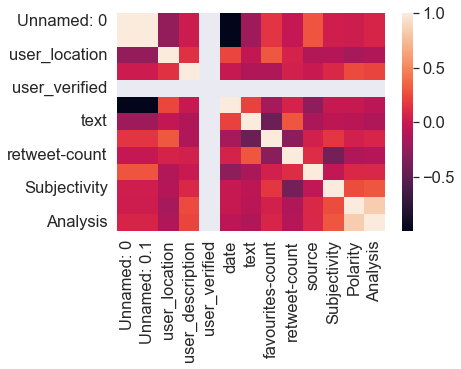

In [43]:
sns.heatmap(data.corr())

In [44]:
# use another model to confirm the accuracy 

In [47]:
# Apply model and check error- eg linear reg
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_predict = linreg.predict(x_test)
print(f" r2 score is: {(r2_score(y_test,y_predict))}")
print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")
print(linreg.intercept_)
print(linreg.coef_)


 r2 score is: 0.6426483557006892
 mse is:0.4414964084890329
1.0952380952380953
[ 5.86267666e-02  5.86267666e-02 -4.30394890e-02  1.91856239e-02
  0.00000000e+00  4.76605920e-02  1.13626258e-04  4.40046298e-02
  2.94825129e-02 -1.94147284e-02  4.16700773e-02  4.73326923e-01]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
accuracy = classifier.score(x_test, y_test) 
print("accuracy is:" ,accuracy*100,"%")

[[1 2 0]
 [0 5 0]
 [0 0 3]]
accuracy is: 81.81818181818183 %
